In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
sns.set(color_codes = True)
%matplotlib qt

In [2]:
df = pd.read_csv('C:\\Users\\Aaron\\Desktop\\ngram project\\words.data', delim_whitespace = True, header = None)

In [74]:
df.tail(500)

,Word,Year,Match Count,Volume Count
86618005,ärmere,2004,5,3
86618006,ärmere,2005,10,10
86618007,ärmere,2006,7,7
86618008,ärmere,2007,3,3
86618009,ärmere,2008,3,3
...,...,...,...,...
86618500,→_ADJ,2004,523,114
86618501,→_ADJ,2005,348,142
86618502,→_ADJ,2006,456,172
86618503,→_ADJ,2007,621,228


In [4]:
col_name = ['Word', 'Year', 'Match Count', 'Volume Count']
df.columns = col_name

In [5]:
df.head()

,Word,Year,Match Count,Volume Count
0,A'Aang_NOUN,1879,45,5
1,A'Aang_NOUN,1882,5,4
2,A'Aang_NOUN,1885,1,1
3,A'Aang_NOUN,1891,1,1
4,A'Aang_NOUN,1899,20,4


In [6]:
df_sorted = df.sort_values('Year')

In [7]:
df_sorted.head()

,Word,Year,Match Count,Volume Count
71519430,alte_ADJ,1505,1,1
58292636,adapted,1505,1,1
79329712,actually_ADV,1505,12,1
28152630,American_ADJ,1505,1,1
72012943,à_NUM,1505,2,1


In [8]:
df_sorted['Word'] = df_sorted['Word'].str.lower()

In [9]:
df_sorted.head()

,Word,Year,Match Count,Volume Count
71519430,alte_adj,1505,1,1
58292636,adapted,1505,1,1
79329712,actually_adv,1505,12,1
28152630,american_adj,1505,1,1
72012943,à_num,1505,2,1


In [10]:
df_volume = df_sorted[df_sorted['Volume Count'] > 1]

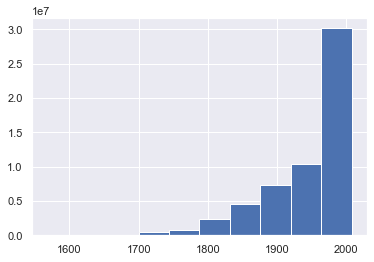

In [11]:
df_volume['Year'].hist()

In [12]:
df

,Word,Year,Match Count,Volume Count
0,A'Aang_NOUN,1879,45,5
1,A'Aang_NOUN,1882,5,4
2,A'Aang_NOUN,1885,1,1
3,A'Aang_NOUN,1891,1,1
4,A'Aang_NOUN,1899,20,4
...,...,...,...,...
86618500,→_ADJ,2004,523,114
86618501,→_ADJ,2005,348,142
86618502,→_ADJ,2006,456,172
86618503,→_ADJ,2007,621,228


In [13]:
df_volume

,Word,Year,Match Count,Volume Count
38637557,assembling_verb,1568,2,2
27820287,ambula_x,1568,2,2
34979781,archbishops,1568,3,2
33923209,as_adv,1568,126,2
45742454,abbot,1568,2,2
...,...,...,...,...
4456390,addres3_noun,2008,2,2
31066609,amples_noun,2008,589,507
80563737,alibamous_noun,2008,15,9
14526772,arabesques,2008,13,11


In [14]:
#drop duplicates
df_volume = df_volume.drop_duplicates()

In [15]:
df_volume

,Word,Year,Match Count,Volume Count
38637557,assembling_verb,1568,2,2
27820287,ambula_x,1568,2,2
34979781,archbishops,1568,3,2
33923209,as_adv,1568,126,2
45742454,abbot,1568,2,2
...,...,...,...,...
4456390,addres3_noun,2008,2,2
31066609,amples_noun,2008,589,507
80563737,alibamous_noun,2008,15,9
14526772,arabesques,2008,13,11


In [16]:
#gets rid of numbers rows with numbers in the wortds
df_num = df_volume[~df_volume.Word.str.contains(r'\d')]
df_num

,Word,Year,Match Count,Volume Count
38637557,assembling_verb,1568,2,2
27820287,ambula_x,1568,2,2
34979781,archbishops,1568,3,2
33923209,as_adv,1568,126,2
45742454,abbot,1568,2,2
...,...,...,...,...
61668914,abdul_verb,2008,471,307
31066609,amples_noun,2008,589,507
80563737,alibamous_noun,2008,15,9
14526772,arabesques,2008,13,11


In [17]:
df_num.iloc[48]

Word            an_det
Year              1568
Match Count         10
Volume Count         2
Name: 28802586, dtype: object

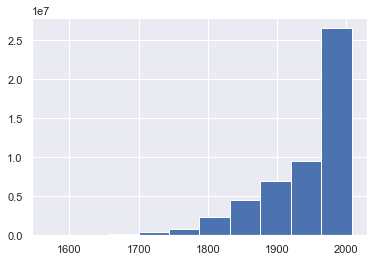

In [19]:
#by this point the first 3 parameters are good. 
df_num['Year'].hist()

In [81]:
df_done = df_num[~df_num.Word.str.contains("[→, !, @, #, $, %, ^, &, *, (, }, +, =, |, \, /, ?, <, >, ~, .]")]

In [82]:
df_done

,Word,Year,Match Count,Volume Count
38637557,assembling_verb,1568,2,2
27820287,ambula_x,1568,2,2
34979781,archbishops,1568,3,2
33923209,as_adv,1568,126,2
45742454,abbot,1568,2,2
...,...,...,...,...
44397162,archimandrites_noun,2008,111,51
61668914,abdul_verb,2008,471,307
31066609,amples_noun,2008,589,507
80563737,alibamous_noun,2008,15,9


In [84]:
df_done.tail(1000)

,Word,Year,Match Count,Volume Count
80581962,anschauliche_det,2008,10,9
44382025,anderberg_verb,2008,21,13
66932833,aiice_det,2008,6,6
31079096,anotherwas,2008,6,6
4447125,absentation,2008,25,19
...,...,...,...,...
44397162,archimandrites_noun,2008,111,51
61668914,abdul_verb,2008,471,307
31066609,amples_noun,2008,589,507
80563737,alibamous_noun,2008,15,9


In [91]:
df_done.groupby('Year').size().plot()

C:\Users\Aaron\Downloads\anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)
